### Product & Price Insights

1. What are the most common **product categories**?
2. What is the **average discounted price** and **average discount percentage** per category?
3. Which **categories** have the **highest** and **lowest** ratings on average?
4. What is the **distribution of product ratings** (1–5 stars)?
5. What percentage of products have a **rating count above the overall mean**?

### Review Insights

6. Who are the **top reviewers** (users with the most reviews)?
7. What are the **most frequent words** in review titles or review content? (Text analysis)
8. Is there a noticeable trend in **review ratings** vs. **review length** (longer reviews = higher/lower ratings)?

---

## What we are going to answer in that section

1. What are the most common **product categories**?
2. What is the **average discounted price** and **average discount percentage** per category?
3. Which **categories** have the **highest** and **lowest** ratings on average?

In [458]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/amazon_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

# clean 
df['actual_price'] = (df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discounted_price'] = (df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discount_percentage'] = (df['discount_percentage'].str.replace('%', '', regex=False).str.replace(',', '', regex=False))
df['rating_count'] = (df['rating_count'].str.replace(',', '', regex=False))
df['rating'] = (df['rating'].str.replace('|', '0', regex=False))


df['actual_price']= df['actual_price'].astype(float)
df['discounted_price']= df['discounted_price'].astype(float)
df['discount_percentage']= df['discount_percentage'].astype(float)
df['rating_count']= df['rating_count'].astype(float)
df['rating']= df['rating'].astype(float)

# turn discount_percentage to float percentage
df['discount_percentage']= df['discount_percentage'].apply(lambda x: x/100)

# make the discounted_price more accurate
df['discounted_price'] = (df['actual_price'] * (1 - df['discount_percentage']))

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### 1. What are the most common **product categories**?

In [460]:
df_top10_categories= df['category'].value_counts().head(10).reset_index()

In [461]:
df_top10_categories

,category,count
0,Computers&Accessories|Accessories&Peripherals|...,233
1,Electronics|WearableTechnology|SmartWatches,76
2,Electronics|Mobiles&Accessories|Smartphones&Ba...,68
3,"Electronics|HomeTheater,TV&Video|Televisions|S...",63
4,"Electronics|Headphones,Earbuds&Accessories|Hea...",52
5,"Electronics|HomeTheater,TV&Video|Accessories|R...",49
6,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,27
7,Computers&Accessories|Accessories&Peripherals|...,24
8,"Electronics|HomeTheater,TV&Video|Accessories|C...",24
9,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",24


In [462]:
df_top10_categories['category_clean'] = df_top10_categories['category'].apply(lambda x: x.split('|')[-1])
df_top10_categories

,category,count,category_clean
0,Computers&Accessories|Accessories&Peripherals|...,233,USBCables
1,Electronics|WearableTechnology|SmartWatches,76,SmartWatches
2,Electronics|Mobiles&Accessories|Smartphones&Ba...,68,Smartphones
3,"Electronics|HomeTheater,TV&Video|Televisions|S...",63,SmartTelevisions
4,"Electronics|Headphones,Earbuds&Accessories|Hea...",52,In-Ear
5,"Electronics|HomeTheater,TV&Video|Accessories|R...",49,RemoteControls
6,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,27,MixerGrinders
7,Computers&Accessories|Accessories&Peripherals|...,24,Mice
8,"Electronics|HomeTheater,TV&Video|Accessories|C...",24,HDMICables
9,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",24,DryIrons


C:\Users\go\AppData\Local\Temp\ipykernel_7252\2341094399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10_categories, y='category_clean', x='count', palette='mako')


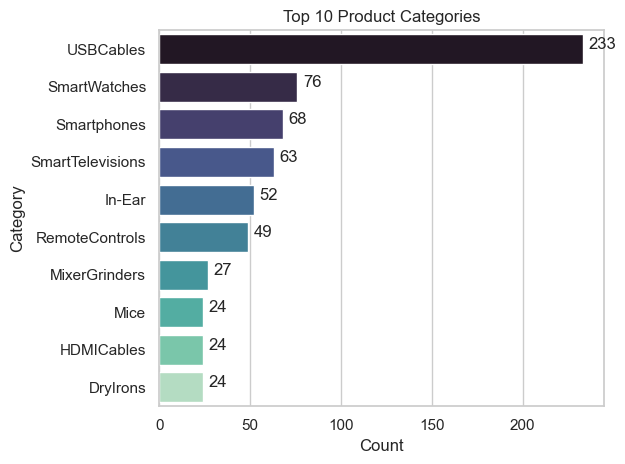

<Figure size 640x480 with 0 Axes>

In [463]:
sns.set_theme(style="whitegrid")

sns.barplot(data=df_top10_categories, y='category_clean', x='count', palette='mako')

for i, value in enumerate(df_top10_categories['count']):
    plt.text(value + 3, i, f'{int(value)}')

plt.title("Top 10 Product Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

sns.despine()

### 2. What is the **average discounted price** and **average discount percentage** per category?
### 3. Which **categories** have the **highest** and **lowest** ratings on average?

In [464]:
df['category_clean']= df['category'].apply(lambda x: x.split('|')[-1]).copy()
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_clean
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,395.64,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,198.93,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,189.90,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,328.53,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,155.61,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,USBCables


In [465]:
df['category_clean'].value_counts().head(10)

category_clean
USBCables           233
SmartWatches         76
Smartphones          68
SmartTelevisions     63
In-Ear               52
RemoteControls       49
MixerGrinders        27
Mice                 24
HDMICables           24
DryIrons             24
Name: count, dtype: int64

### collecting data 

In [466]:
df_USBCables=df[df['category_clean'] == 'USBCables']
df_SmartWatches=df[df['category_clean'] == 'SmartWatches']
df_Smartphones=df[df['category_clean'] == 'Smartphones']
df_SmartTelevisions=df[df['category_clean'] == 'SmartTelevisions']
df_In_Ear=df[df['category_clean'] == 'In-Ear']
df_RemoteControls=df[df['category_clean'] == 'RemoteControls']
df_MixerGrinders=df[df['category_clean'] == 'MixerGrinders']
df_Mice=df[df['category_clean'] == 'Mice']
df_HDMICables=df[df['category_clean'] == 'HDMICables']
df_DryIrons=df[df['category_clean'] == 'DryIrons']


df_concat= pd.concat([df_USBCables,
                    df_SmartWatches,
                    df_Smartphones,
                    df_SmartTelevisions,
                    df_In_Ear,
                    df_RemoteControls,
                    df_MixerGrinders,
                    df_Mice,
                    df_HDMICables,
                    df_DryIrons,])

df_concat

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_clean
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,395.64,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,198.93,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,189.90,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,328.53,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,155.61,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,USBCables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,B07YSJ7FF1,Crompton Brio 1000-Watts Dry Iron with Weilbur...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",649.00,1100.0,0.41,4.0,3271.0,PRODUCT: Crompton's dry iron with Weilburger N...,"AF2JJYV2AX7CVSWYMLNZGFVHPLZA,AF4ZKPEZDK4MBC74G...","Lakshmi d.,vishal more,Vasanth Kumar,naveen,Go...","R29AV9WKFL78NP,RWFBNIYQTMW4A,R11CTFK86N4XV0,R2...","Good,Easy to handling ..satisfied,Good,Good,Qu...","Good,https://m.media-amazon.com/images/I/41D5G...",https://m.media-amazon.com/images/I/41Yb7bZL3n...,https://www.amazon.in/Crompton-BRIO-1000-Years...,DryIrons
1371,B07LDPLSZC,Havells Glydo 1000 watt Dry Iron With American...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",844.90,1190.0,0.29,4.2,4184.0,360 degree swivel cord for effortless manoeuvr...,"AFUXDVUZ2STL3ALSLWBDEAJBR7BA,AF7GFM2ILS43R3R7Z...","Swati Chaudhari,Anil kumar,Dinesh Verma,Arvind...","R2MQ8OBLUYQBDI,R2RLW3M6VML3F7,R1J

### 🧩 What `enumerate()` Does

The **`enumerate()`** function adds a **counter (index number)** to something you’re looping through.

So instead of just getting the **value**, you also get the **index** of that value.

---

### 🧠 Example

Suppose you have a list:

```python
list_of_categories = ['Phones', 'Laptops', 'Headphones']
```

If you write:

```python
for value in list_of_categories:
    print(value)
```

You’ll get:

```
Phones
Laptops
Headphones
```

---

### ✅ Now, using `enumerate()`:

```python
for index, value in enumerate(list_of_categories):
    print(index, value)
```

**Output:**

```
0 Phones
1 Laptops
2 Headphones
```

Here:

* `index` → comes from `enumerate()` (starts from 0 by default)
* `value` → is each element of the list

---

### ⚠️ In Your Example:

```python
for value, i in enumerate(list_of_catigories):
    print(list_of_catigories[i])
```

This is **incorrect** because you reversed the variables —
`enumerate()` returns `(index, value)`, **not** `(value, index)`.

✅ The correct version is:

```python
for i, value in enumerate(list_of_catigories):
    print(list_of_catigories[i])
```



In [467]:
df_concat= df_concat.groupby('category_clean').agg({'discounted_price' : 'mean'
                                         ,'discount_percentage' : 'mean'
                                         ,'rating' : 'mean'}).sort_values(by= 'discounted_price', ascending= False)
df_concat

,discounted_price,discount_percentage,rating
category_clean,,,
SmartTelevisions,24851.793810,0.382857,4.209524
Smartphones,15757.606912,0.232941,4.100000
MixerGrinders,3004.804074,0.439630,4.011111
SmartWatches,2344.341842,0.698158,4.025000
In-Ear,975.187885,0.582692,3.898077
DryIrons,762.687083,0.342500,4.129167
Mice,610.011667,0.420417,4.287500
RemoteControls,438.868776,0.595102,3.800000
HDMICables,405.993333,0.597917,4.254167


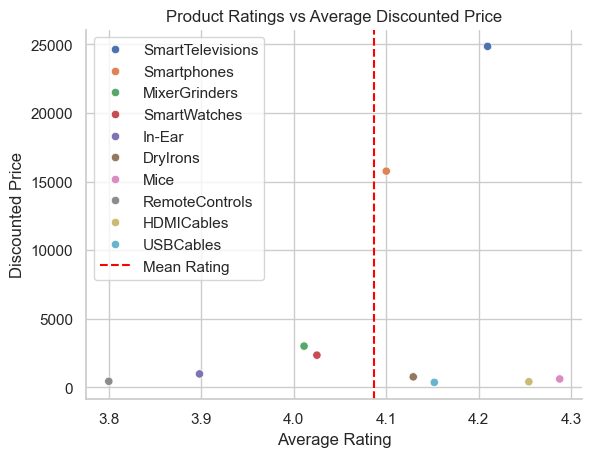

In [468]:
sns.set_theme(style="whitegrid")

mean_rating= df_concat['rating'].mean()

sns.scatterplot(data=df_concat, x='rating', y='discounted_price', hue='category_clean')
plt.axvline(x=mean_rating, color='red', linestyle='--', label='Mean Rating')

sns.despine()
plt.title('Product Ratings vs Average Discounted Price')
plt.xlabel('Average Rating')
plt.ylabel('Discounted Price')
plt.legend()
plt.show()